# United States Gun Violence

Gun Violence in the United States is an issue that is as unfortunate as it is alarming. Shootings have become so commonplace in the US that some have referred to Gun Violence as an epidemic, in the same vein as diseases like Covid-19. And while it may not be a virus in the strictest sense, it has devastated more than a few communities in the US throughout this country's history, and continues to do so today.

In this project, we will analyze a dataset on Gun Violence incidents that have occurred from 1982 all the way up to 2023, to develop a better understanding of how Gun Violence has affected this country in the past and how it continues to affect this country in the present.

## 1. Ask

### 1-1. Business Task

The goal of this project is to explore and analyze data on gun violence in the United States using the Python programming language, to find answers to the following questions;

**1.** How has the rate of gun violence incidents behaved from 1982-2023?

**2.** What’s the average amount of injured/fatalities/victims per incident?

**3.** What are the most common race/gender identities of shooters?

**4.** Which states had the most gun violence incidents?

**5.** Are there any correlations you can find between different metrics in the dataset?

## 2. Prepare

### 2-1. The Data in play

The dataset I am using for this Analysis is the ['Gun Violence, USA']('https://www.kaggle.com/datasets/nidzsharma/us-mass-shootings-19822023') dataset made available on Kaggle by user Nidhi Sharma under a ['CC0: Public Domain']('https://creativecommons.org/publicdomain/zero/1.0/') license. It contains 141 rows of data on gun violence shootings committed from 1982-2023, spread out across 21 columns containing information on the type of gun violence incident that occurred, how many victims there were in the incident, details on the identity of the shooter who caused the incident, and more.

It should be said that I have already familiarized myself with the dataset prior to undertaking this analysis, and have performed some basic pre-processing tasks on the dataset in Excel to make it easier to explore, process, and analyze in Python. Details on the performed pre-processing tasks can be found in the readme file accompanying this notebook.

In [1]:
#Import libraries and dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.graph_objs as go #import the graphical objects (plots) we'll need
#more potentially useful plotly imports
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.express as px

df = pd.read_excel('shooting-1982-2023_copy.xlsx')

In [2]:
#Checking the structure of the dataset.
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
df.info()

Number of Rows: 141
Number of Columns: 22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   case                              141 non-null    object
 1   location_trimmed                  141 non-null    object
 2   state_trimmed                     141 non-null    object
 3   type                              141 non-null    object
 4   location_type                     141 non-null    object
 5   race                              141 non-null    object
 6   gender                            141 non-null    object
 7   date                              141 non-null    object
 8   year                              141 non-null    int64 
 9   fatalities                        141 non-null    int64 
 10  injured                           141 non-null    int64 
 11  total_victims                     141 non-

In [3]:
df.head()

,case,location_trimmed,state_trimmed,type,location_type,race,gender,date,year,fatalities,...,age_of_shooter,summary,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,latitude,longitude
0,Nashville religious school shooting,Nashville,Tennessee,Mass,School,-,"F (identified as transgender, per police)",2023-03-27 00:00:00,2023,6,...,28,"Audrey Hale, 28, who was a former student at t...",-,-,-,-,"semiautomatic rifle, semiautomatic handgun",-,-,-
1,Michigan State University shooting,East Lansing,Michigan,Mass,School,Black,M,2023-02-13 00:00:00,2023,3,...,43,"Anthony D. McRae, 43, opened fire at Berkey Ha...",-,-,yes,-,semiautomatic handguns,-,-,-
2,Half Moon Bay spree shooting,Half Moon Bay,California,Spree,workplace,Asian,M,2023-01-23 00:00:00,2023,7,...,67,"Chunli Zhao, 67, suspected of carrying out the...",-,-,-,-,semiautomatic handgun,-,-,-
3,LA dance studio mass shooting,Monterey Park,California,Mass,Other,Asian,M,2023-01-21 00:00:00,2023,11,...,72,"Huu Can Tran, 72, fled the scene in a white va...",yes,"According to the LA Times, ""Two law enforcemen...",-,-,semiautomatic assault weapon (Details pending),-,-,-
4,Virginia Walmart shooting,Chesapeake,Virginia,Mass,Workplace,Black,M,2022-11-22 00:00:00,2022,6,...,31,"Andre Bing, 31, who worked as a supervisor at ...",-,-,-,-,semiautomatic handgun,-,-,-


## 3. Process

Before our analysis can begin, the data has to be processed. This dataset is full of erroneous, dirty data that needs to be cleaned up before it can be used for analysis.

### 3-1. Data Cleaning

#### 3-1-1. Dealing with missing values
This dataset is filled with '-' values where no data could be collected. As such, these are effectively null values; but they are not treated as nulls by Python.

To make these values easier to deal with, we will convert them to their proper 'null' datatypes, and then visualize the distribution of null values to see which columns have the most missing data.

In [4]:
#Converting '-' values to null values
for col in df.columns:
    df[col].replace({'-':np.nan},inplace=True)
    
df.head()

,case,location_trimmed,state_trimmed,type,location_type,race,gender,date,year,fatalities,...,age_of_shooter,summary,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,latitude,longitude
0,Nashville religious school shooting,Nashville,Tennessee,Mass,School,NaN,"F (identified as transgender, per police)",2023-03-27 00:00:00,2023,6,...,28.0,"Audrey Hale, 28, who was a former student at t...",NaN,NaN,NaN,NaN,"semiautomatic rifle, semiautomatic handgun",NaN,NaN,NaN
1,Michigan State University shooting,East Lansing,Michigan,Mass,School,Black,M,2023-02-13 00:00:00,2023,3,...,43.0,"Anthony D. McRae, 43, opened fire at Berkey Ha...",NaN,NaN,yes,NaN,semiautomatic handguns,NaN,NaN,NaN
2,Half Moon Bay spree shooting,Half Moon Bay,California,Spree,workplace,Asian,M,2023-01-23 00:00:00,2023,7,...,67.0,"Chunli Zhao, 67, suspected of carrying out the...",NaN,NaN,NaN,NaN,semiautomatic handgun,NaN,NaN,NaN
3,LA dance studio mass shooting,Monterey Park,California,Mass,Other,Asian,M,2023-01-21 00:00:00,2023,11,...,72.0,"Huu Can Tran, 72, fled the scene in a white va...",yes,"According to the LA Times, ""Two law enforcemen...",NaN,NaN,semiautomatic assault weapon (Details pending),NaN,NaN,NaN
4,Virginia Walmart shooting,Chesapeake,Virginia,Mass,Workplace,Black,M,2022-11-22 00:00:00,2022,6,...,31.0,"Andre Bing, 31, who worked as a supervisor at ...",NaN,NaN,NaN,NaN,semiautomatic handgun,NaN,NaN,NaN


<AxesSubplot:>

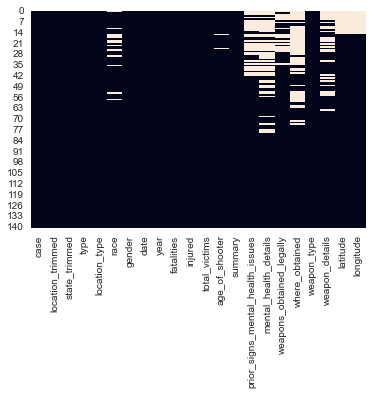

In [5]:
#Visualizing null data
sns.heatmap(df.isnull(),cbar=False)

Let's start cleaning up these null values now, starting with the race column.

In [6]:
#Checking the values of the race column
df['race'].isnull().sum()

13

In [7]:
df['race'].value_counts()

white              41
White              31
Black              16
Latino             11
Asian              10
black               9
Other               5
Native American     3
White               1
unclear             1
Name: race, dtype: int64

In [8]:
#Filling all null values in race column with 'Unclear'
df['race'].fillna('Unclear',inplace=True)

In [9]:
df['race'].value_counts()

white              41
White              31
Black              16
Unclear            13
Latino             11
Asian              10
black               9
Other               5
Native American     3
White               1
unclear             1
Name: race, dtype: int64

Onto the next column; age_of_shooter.

In [10]:
df[df['age_of_shooter'].isnull()]

,case,location_trimmed,state_trimmed,type,location_type,race,gender,date,year,fatalities,...,age_of_shooter,summary,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,latitude,longitude
15,Sacramento County church shooting,Sacramento,California,Mass,Religious,Unclear,M,2022-02-28 00:00:00,2022,4,...,NaN,"""A man believed to be meeting his three childr...",NaN,NaN,NaN,NaN,semiautomatic rifle,"AR-15-style ""ghost gun""",38.601110,-121.418966
24,Jersey City kosher market shooting,Jersey City,New Jersey,Spree,Other,Black,Male & Female,2019-12-10 00:00:00,2019,4,...,NaN,"David N. Anderson, 47, and Francine Graham, 50...",NaN,NaN,NaN,NaN,semiautomatic rifle; shotgun; semiautomatic ha...,AR-15-style rifle; Mossberg 12-gauge shotgun; ...,40.707363,-74.083609


Since there are only two null values in this column, it's feasible for me to fill these null values by researching each case for information on the shooter's age.

In the case of the Sacramento County church shooting, the shooter [(according to this article)](https://www.cnn.com/2022/02/28/us/sacramento-church-shooting/index.html) was identified as 39-year-old David Mora Rojas.

In [11]:
df.loc[15, 'age_of_shooter'] = 39

In [12]:
df[df['case']=='Sacramento County church shooting']['age_of_shooter']

15    39.0
Name: age_of_shooter, dtype: float64

In the case of the Jersey City kosher market shooting, we already have the age of the shooters in the summary article included in the dataset. The only problem is there were multiple shooters involved, meaning there are multiple ages to consider; 47, and 50.

As such, I will set the value for age_of_shooter here to be 48.5; a middle ground between the two ages.

In [13]:
df.loc[24, 'age_of_shooter'] = 48.5

Now let's move onto the next column on our list; prior_signs_mental_health issues

In [14]:
df['prior_signs_mental_health_issues'].isnull().sum()

28

In [15]:
df['prior_signs_mental_health_issues'].value_counts()

Yes         58
Unclear     23
No          17
yes          8
TBD          5
Unknown      1
Unclear      1
Name: prior_signs_mental_health_issues, dtype: int64

In [16]:
df['prior_signs_mental_health_issues'].fillna('Unknown',inplace=True)

In [17]:
df['prior_signs_mental_health_issues'].value_counts()

Yes         58
Unknown     29
Unclear     23
No          17
yes          8
TBD          5
Unclear      1
Name: prior_signs_mental_health_issues, dtype: int64

Onto the next column; weapons_obtained_legally

In [18]:
df['weapons_obtained_legally'].isnull().sum()

17

In [19]:
df['weapons_obtained_legally'].value_counts()

Yes                                                                                                                                    81
No                                                                                                                                     16
yes                                                                                                                                     9
TBD                                                                                                                                     7
Unknown                                                                                                                                 6
\nYes                                                                                                                                   2
Kelley passed federal criminal background checks; the US Air Force failed to provide information on his criminal history to the FBI     1
Yes ("some of the weapons were pur

In [20]:
df['weapons_obtained_legally'].fillna('Unknown',inplace=True)

In [21]:
df['weapons_obtained_legally'].value_counts()

Yes                                                                                                                                    81
Unknown                                                                                                                                23
No                                                                                                                                     16
yes                                                                                                                                     9
TBD                                                                                                                                     7
\nYes                                                                                                                                   2
Kelley passed federal criminal background checks; the US Air Force failed to provide information on his criminal history to the FBI     1
Yes ("some of the weapons were pur

In [22]:
df.head()

,case,location_trimmed,state_trimmed,type,location_type,race,gender,date,year,fatalities,...,age_of_shooter,summary,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,latitude,longitude
0,Nashville religious school shooting,Nashville,Tennessee,Mass,School,Unclear,"F (identified as transgender, per police)",2023-03-27 00:00:00,2023,6,...,28.0,"Audrey Hale, 28, who was a former student at t...",Unknown,NaN,Unknown,NaN,"semiautomatic rifle, semiautomatic handgun",NaN,NaN,NaN
1,Michigan State University shooting,East Lansing,Michigan,Mass,School,Black,M,2023-02-13 00:00:00,2023,3,...,43.0,"Anthony D. McRae, 43, opened fire at Berkey Ha...",Unknown,NaN,yes,NaN,semiautomatic handguns,NaN,NaN,NaN
2,Half Moon Bay spree shooting,Half Moon Bay,California,Spree,workplace,Asian,M,2023-01-23 00:00:00,2023,7,...,67.0,"Chunli Zhao, 67, suspected of carrying out the...",Unknown,NaN,Unknown,NaN,semiautomatic handgun,NaN,NaN,NaN
3,LA dance studio mass shooting,Monterey Park,California,Mass,Other,Asian,M,2023-01-21 00:00:00,2023,11,...,72.0,"Huu Can Tran, 72, fled the scene in a white va...",yes,"According to the LA Times, ""Two law enforcemen...",Unknown,NaN,semiautomatic assault weapon (Details pending),NaN,NaN,NaN
4,Virginia Walmart shooting,Chesapeake,Virginia,Mass,Workplace,Black,M,2022-11-22 00:00:00,2022,6,...,31.0,"Andre Bing, 31, who worked as a supervisor at ...",Unknown,NaN,Unknown,NaN,semiautomatic handgun,NaN,NaN,NaN


<AxesSubplot:>

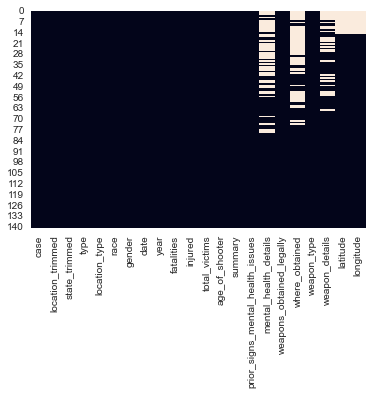

In [23]:
sns.heatmap(df.isnull(),cbar=False)

The remaining null columns in our dataset contain data that won't be strictly useful for our analysis. So instead of dealing with the missing values, we will just drop them from the dataset.

In [24]:
cols_to_drop = ['mental_health_details', 'where_obtained', 'weapon_type', 'weapon_details', 'latitude', 'longitude']

In [25]:
df.drop(cols_to_drop,axis=1,inplace=True)

<AxesSubplot:>

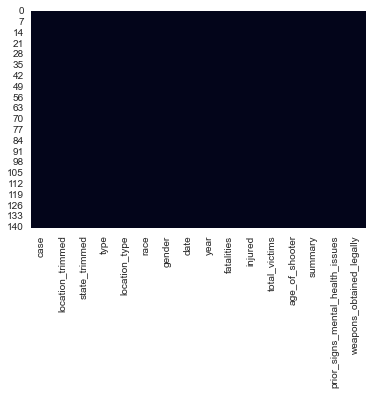

In [26]:
sns.heatmap(df.isnull(),cbar=False)

#### 3-1-2. Correcting inconsistencies in the data

Null values weren't the only problem with our data; we also discovered plenty of inconsistencies in the data as well. Before we begin our analysis, we'll have to correct these inconsistencies.

Let's start with the location_type column.

In [27]:
df['location_type'].value_counts()

Other          50
Workplace      45
School         22
Religious       7
Military        6
workplace       5
Other\n         3
religious       1
Airport         1
\nWorkplace     1
Name: location_type, dtype: int64

In [28]:
#Creating a function to fix text inconsistencies
def text_correction(text):
    if text[0].islower():
        return text.capitalize().strip()
    else:
        return text.capitalize().strip()

df['location_type'] = df['location_type'].apply(text_correction)
df['location_type'].value_counts()

Other        53
Workplace    50
School       22
Religious     8
Military      6
Airport       1
workplace     1
Name: location_type, dtype: int64

In [29]:
#Applying text_correction one more time to fix last remaining error
df['location_type'] = df['location_type'].apply(text_correction)
df['location_type'].value_counts()

Other        53
Workplace    51
School       22
Religious     8
Military      6
Airport       1
Name: location_type, dtype: int64

Now onto the next column; race.

In [30]:
df['race'].value_counts()

white              41
White              31
Black              16
Unclear            13
Latino             11
Asian              10
black               9
Other               5
Native American     3
White               1
unclear             1
Name: race, dtype: int64

In [31]:
df['race'] = df['race'].apply(text_correction)
df['race'].value_counts()

White              73
Black              25
Unclear            14
Latino             11
Asian              10
Other               5
Native american     3
Name: race, dtype: int64

Let's work on the gender column next.

In [32]:
df['gender'].value_counts()

Male                                         70
M                                            65
Male & Female                                 2
Female                                        2
F (identified as transgender, per police)     1
F                                             1
Name: gender, dtype: int64

In [33]:
df['gender'] = df['gender'].apply(lambda text: 'Male' if text == 'M' else 'Female' if text[0]=='F' else text)

In [34]:
df['gender'].value_counts()

Male             135
Female             4
Male & Female      2
Name: gender, dtype: int64

Cleaning up the prior_signs_mental_health_issues column next.

In [35]:
df['prior_signs_mental_health_issues'].value_counts()

Yes         58
Unknown     29
Unclear     23
No          17
yes          8
TBD          5
Unclear      1
Name: prior_signs_mental_health_issues, dtype: int64

In [36]:
#Set 'Unclear' to 'Unknown'
df['prior_signs_mental_health_issues'] = df['prior_signs_mental_health_issues'].apply(text_correction)
df['prior_signs_mental_health_issues'] = df['prior_signs_mental_health_issues'].apply(lambda text: 'Unknown' if text.lower() in ['unknown','unclear'] else 'Unknown' if text.lower() == 'tbd' else text)
#Capitalize first letters and trim whitespace
df['prior_signs_mental_health_issues'] = df['prior_signs_mental_health_issues'].apply(text_correction)
#Show results
df['prior_signs_mental_health_issues'].value_counts()

Yes        66
Unknown    58
No         17
Name: prior_signs_mental_health_issues, dtype: int64

Now onto the last column; weapons_obtained_legally.

In [37]:
df['weapons_obtained_legally'].value_counts()

Yes                                                                                                                                    81
Unknown                                                                                                                                23
No                                                                                                                                     16
yes                                                                                                                                     9
TBD                                                                                                                                     7
\nYes                                                                                                                                   2
Kelley passed federal criminal background checks; the US Air Force failed to provide information on his criminal history to the FBI     1
Yes ("some of the weapons were pur

In [38]:
df['weapons_obtained_legally'] = df['weapons_obtained_legally'].apply(lambda text: 'Yes' if 'yes' in text.lower() else 'Unknown' if text.lower() == 'tbd' else 'Unknown' if text.lower() == 'kelley passed federal criminal background checks; the us air force failed to provide information on his criminal history to the fbi' else text)
df['weapons_obtained_legally'] = df['weapons_obtained_legally'].apply(text_correction)
df['weapons_obtained_legally'].value_counts()

Yes        94
Unknown    31
No         16
Name: weapons_obtained_legally, dtype: int64

Now our data should be clean enough to analyze and visualize. Let's move on.

## 4. Analyze & Share

Let's start finding answers to our questions about the data. Starting with the first question;

### Question 1: How has the rate of gun violence incidents behaved from 1982-2023?

In [39]:
shootings_by_year = df.groupby('year').count()

In [40]:
shootings_by_year.head()

,case,location_trimmed,state_trimmed,type,location_type,race,gender,date,fatalities,injured,total_victims,age_of_shooter,summary,prior_signs_mental_health_issues,weapons_obtained_legally
year,,,,,,,,,,,,,,,
1982,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1984,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1986,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1987,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1988,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Text(0, 0.5, 'Total Incidents')

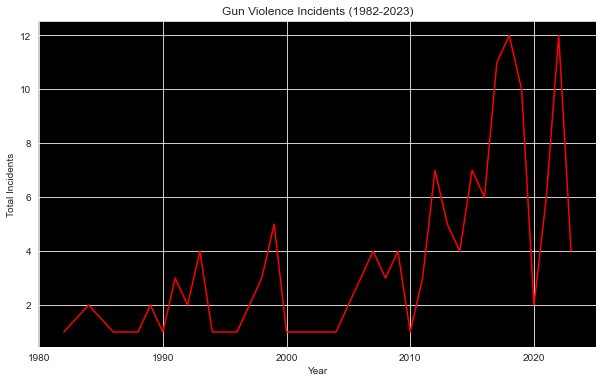

In [41]:
plt.figure(figsize=(10,6))
sns.lineplot(data=shootings_by_year,x=shootings_by_year.index,y='case',color='red')
ax = plt.gca()
ax.set_facecolor('black')
plt.title("Gun Violence Incidents (1982-2023)")
plt.xlabel('Year')
plt.ylabel('Total Incidents')

From the plot above we can see that the rate of gun violence in the United States has been on the rise over the years, experiencing a dramatic increase in frequency after 2003-2004 and peaking in the years 2018 and 2022. It's also worthy of note that the frequency of gun violence incidents in the United States experienced a dramatic decline in the year 2020, when the Covid-19 Quarantine began.

Let's take our analysis a step further by asking some additional questions.

#### Which year had the most gun violence incidents?

In [42]:
shootings_by_year[shootings_by_year['case']==shootings_by_year['case'].max()]

,case,location_trimmed,state_trimmed,type,location_type,race,gender,date,fatalities,injured,total_victims,age_of_shooter,summary,prior_signs_mental_health_issues,weapons_obtained_legally
year,,,,,,,,,,,,,,,
2018,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
2022,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


From this, we can see that the years 2018 and 2022 are tied for the most gun violence incidents in a single year. Let's make a visualization for this:

Text(103.75, 0.5, 'Incidents')

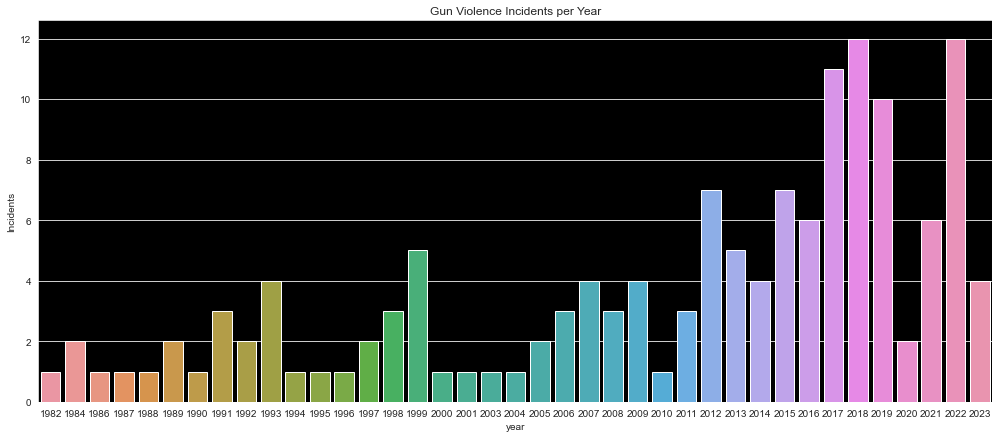

In [43]:
plt.figure(figsize=(14,6))
sns.barplot(data=shootings_by_year, x=shootings_by_year.index,y='case')
ax = plt.gca()
ax.set_facecolor('black')
plt.tight_layout()
plt.title("Gun Violence Incidents per Year")
plt.ylabel("Incidents")

#### Which year had the most gun violence fatalities?

In [44]:
totals_by_year = df.groupby('year').sum()

In [45]:
totals_by_year[totals_by_year['fatalities']==totals_by_year['fatalities'].max()]['fatalities']

year
2017    117
Name: fatalities, dtype: int64

Text(0.5, 1.0, 'Gun Violence Fatalities per Year')

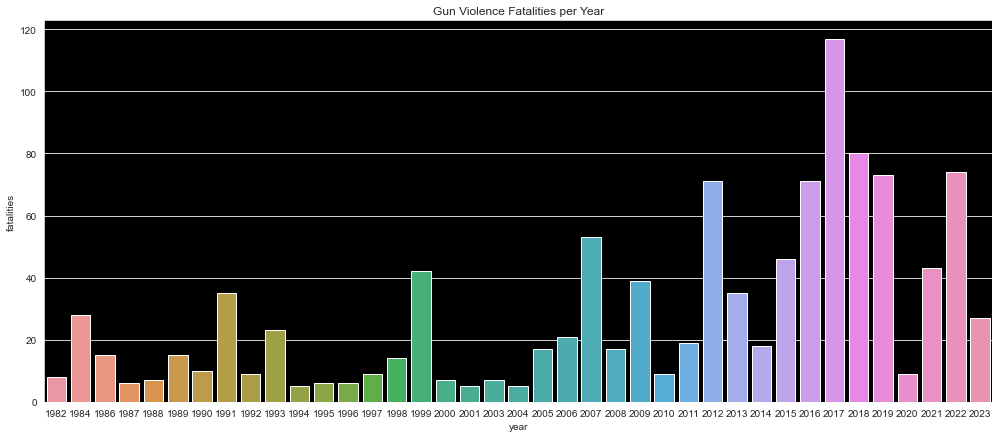

In [46]:
plt.figure(figsize=(14,6))
sns.barplot(data=totals_by_year, x=totals_by_year.index, y='fatalities')
ax = plt.gca()
ax.set_facecolor('black')
plt.tight_layout()
plt.title("Gun Violence Fatalities per Year")

In [47]:
df[df['fatalities']==df['fatalities'].max()]

,case,location_trimmed,state_trimmed,type,location_type,race,gender,date,year,fatalities,injured,total_victims,age_of_shooter,summary,prior_signs_mental_health_issues,weapons_obtained_legally
50,Las Vegas Strip massacre,Las Vegas,Nevada,Mass,Other,White,Male,2017-10-01 00:00:00,2017,58,546,604,64.0,"Stephen Craig Paddock, 64, fired a barrage of ...",Unknown,Yes


In [48]:
print(df[df['year']==2017]['summary'][50])

Stephen Craig Paddock, 64, fired a barrage of rapid gunfire—using semiautomatic rifles modified with "bump stocks"—at thousands of concertgoers on the Las Vegas Strip late on a Sunday night; Paddock had positioned himself in a corner suite on the 32nd floor of the Mandalay Bay Resort and Casino, where he took aim from windows he'd smashed open. Police responding to the attack found Paddock inside the hotel suite, deceased from a self-inflicted gunshot.


### Question 2: What’s the average amount of injured/fatalities/victims per incident?

Before we can answer this question, we have to address one significant outlier that could skew the results of our analysis.

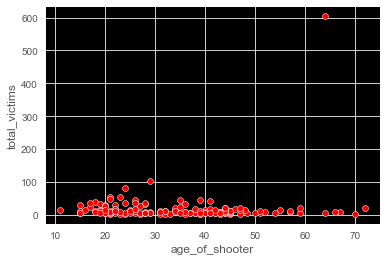

In [49]:
plt.style.use('ggplot')
sns.scatterplot(data=df, x='age_of_shooter',y='total_victims',color='red')
ax = plt.gca()
ax.set_facecolor('black')

The incident in question is the Las Vegas Strip massacre.

In [50]:
df[df['fatalities']==df['fatalities'].max()][['year', 'fatalities', 'injured', 'total_victims']]

,year,fatalities,injured,total_victims
50,2017,58,546,604


In [51]:
print(df.loc[50]['summary'])

Stephen Craig Paddock, 64, fired a barrage of rapid gunfire—using semiautomatic rifles modified with "bump stocks"—at thousands of concertgoers on the Las Vegas Strip late on a Sunday night; Paddock had positioned himself in a corner suite on the 32nd floor of the Mandalay Bay Resort and Casino, where he took aim from windows he'd smashed open. Police responding to the attack found Paddock inside the hotel suite, deceased from a self-inflicted gunshot.


Though this incident was tragic, it is also a significant outlier in our dataset that will hinder Python's ability to find an accurate average of the numerical features in our dataset. So before we can perform our calculations, we have to deal with it.

That being said, I don't want to remove the incident from our project entirely, as it is still data that could be useful to our analysis--not to mention that this tragedy deserves to be included in our analysis. So I will create a copy of our dataframe that does not contain the outlier, and perform our calculations on that dataframe instead.

In [52]:
#New dataframe without outlier
df2 = df.copy()
df2.drop(df.index[50],inplace=True)

In [53]:
df2.describe()

,year,fatalities,injured,total_victims,age_of_shooter
count,140.000000,140.000000,140.000000,140.000000,140.000000
mean,2010.335714,7.450000,7.414286,14.828571,33.939286
std,10.820717,6.151943,10.614220,14.747731,12.983868
min,1982.000000,3.000000,0.000000,3.000000,11.000000
25%,2004.750000,4.000000,1.000000,6.000000,22.750000
50%,2014.000000,6.000000,3.000000,10.000000,32.500000
75%,2018.000000,8.000000,10.000000,17.000000,43.000000
max,2023.000000,49.000000,70.000000,102.000000,72.000000


Now let's find our averages.

In [54]:
#Average injuries
df2['injured'].mean()

7.414285714285715

In [55]:
#Average fatalities
df2['fatalities'].mean()

7.45

In [56]:
#Average total victims
df2['total_victims'].mean()

14.82857142857143

Now let's move onto our next question.

### Question 3: Are there any correlations you can find between different metrics in the dataset?

Before we can answer this question, there are some features of our dataset that we have to turn into numerical values so that we can check their correlation to the other features in our dataset.

In [57]:
#Creating numerized versions of columns, to check for correlation

#type numerization
mapping = {'Mass': 0, 'Spree': 1}
df2['type_numerized'] = df2['type'].replace(mapping)

#location_type numerization
mapping_two = {'Other': 0, 'Workplace': 1, 'School': 2, 'Religious': 3, 'Military': 4, 'Airport': 5}
df2['location_type_numerized'] = df2['location_type'].replace(mapping_two)

#weapons_obtained_legally numerization
mapping_three = {'Yes': 0, 'Unknown': 1, 'No': 2}
df2['weapons_numerized'] = df2['weapons_obtained_legally'].replace(mapping_three)

#Mental health numerization
df2['mental_health_numerized'] = df2['prior_signs_mental_health_issues'].replace(mapping_three)

Now that our features have been numerized, we can plot them on a corrmap to visualize their correlation.

<AxesSubplot:>

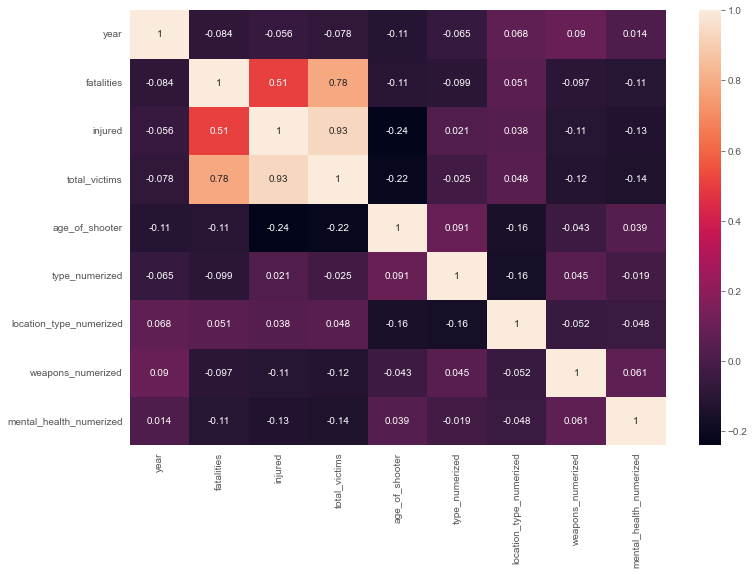

In [58]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(),annot=True)

The figure above shows us that the only significant correlations between different metrics in our dataset (aside from identical metrics, which obviously don't count) are positive correlations between:

1. **Total victims and injured** (0.93 Correlation)
2. **Total victims and fatalities** (0.78 correlation)
3. **Injured and fatalities** (0.51 Correlation)

Beyond these, there are no significant correlations or patterns between any metrics in our dataset.

Now let's move onto our next question.

### Question 4: What are the most common race/gender identities of shooters?

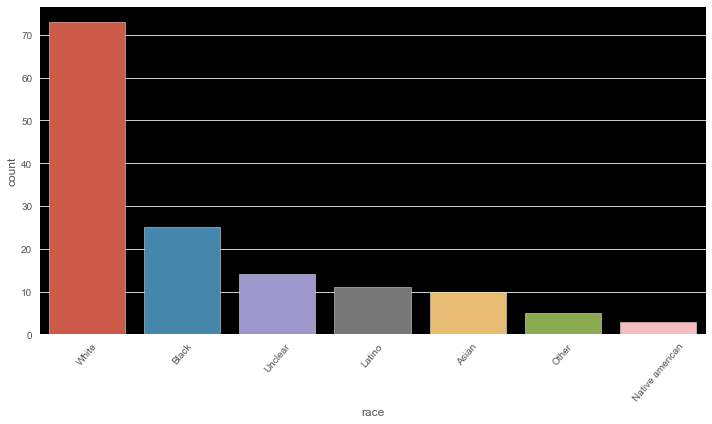

In [59]:
#Race distribution of shooters
display_order = df['race'].value_counts().index.tolist()
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='race', order=display_order)
ax = plt.gca()
ax.set_facecolor('black')
plt.xticks(rotation=50)
plt.tight_layout()

The above visualization tells us that the most common racial identity for shooters is 'White,' making up a vast majority of our dataset. The second most common racial identity for shooters is Black, and the third most common racial identity is 'Unclear,' meaning that their racial identity could not be determined.

Let's check the gender distribution of shooters, next.

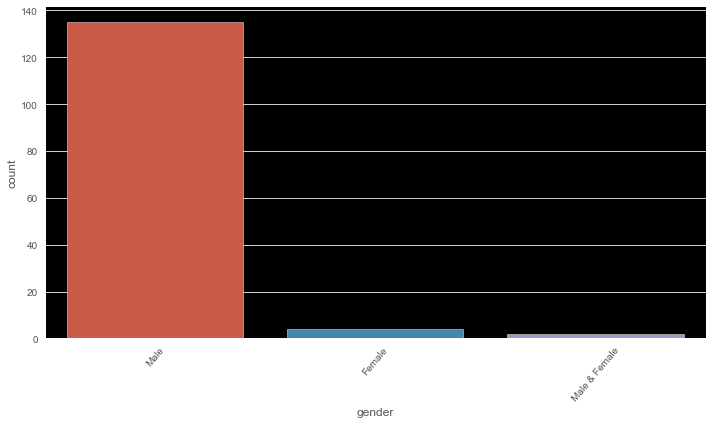

In [60]:
#Gender distribution of shooters
plt.figure(figsize=(10,6))
display_order_two = df['gender'].value_counts().index.tolist()
sns.countplot(data=df, x='gender', order=display_order_two)
ax = plt.gca()
ax.set_facecolor('black')
plt.xticks(rotation=50)
plt.tight_layout()

The vast majority of shooters identify as male, with a small minority identifying as female. (It should be noted that the 'Male & Female' marks on the visualization simply represent incidents in which both male and female shooters were involved.)

Let's take our analysis a step further by visualizing the most common locations for Mass/Spree shootings to occur at.

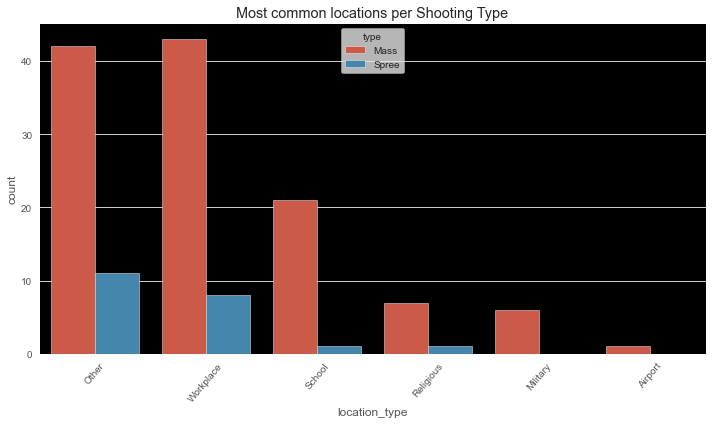

In [61]:
#Most common locations per shooting type
display_order_three = df['location_type'].value_counts().index.tolist()
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='location_type',hue='type',order=display_order_three)
ax = plt.gca()
ax.set_facecolor('black')
plt.title("Most common locations per Shooting Type")
plt.xticks(rotation=50)
plt.tight_layout()

From this we can see that:

1. The vast majority of all gun violence incidents were classified as 'Mass' shootings.
2. The most common locations for shootings of both types were 'Workplace,' 'School,' other miscellaneous locations. Shootings in these locations make up the majority of the data in our dataset.
3. Shootings at religious and military sites are significantly less common than other types of shootings. Additionally, there is only one instance of an Airport shooting from 1982-2023.

Let's take our analysis even further by asking another question; 

#### How many shooters obtained their weapons legally? Additionally; how many of these shooters showed signs of mental distress prior to obtaining their weapons?

Text(0.5, 0, 'Weapons Obtained Legally')

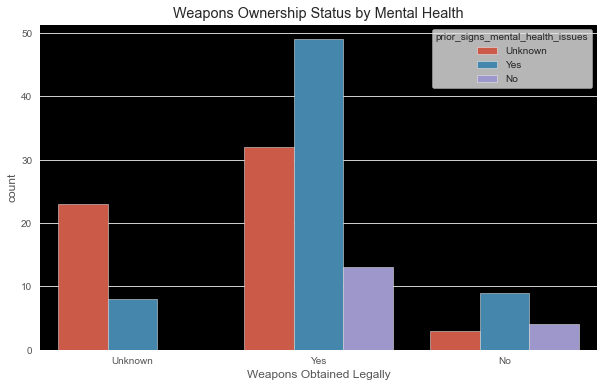

In [62]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='weapons_obtained_legally', hue='prior_signs_mental_health_issues')
ax = plt.gca()
ax.set_facecolor('black')
plt.title("Weapons Ownership Status by Mental Health")
plt.xlabel("Weapons Obtained Legally")

The visualization above shows us that the majority of shooters did obtain their weapons legally. More than that, it also shows us that most shooters--including those who obtained their weapons legally--either showed signs of prior mental distress, or had anonymous histories with mental health.

Now let's move onto our last question.

### Question 5: Which states had the most gun violence incidents?

Before we can answer this question, there is a minor error in the 'state_trimmed' column that we need to correct. Louisiana was accidentally mispelled.

In [63]:
df['state_trimmed'] = df['state_trimmed'].apply(lambda state: 'Louisiana' if state == 'Lousiana' else state)

With that out of the way, we can focus on creating our plot. First, we'll need to add a new column to our dataframe that contains the abbreviations of every state. We do this because we are going to be plotting our data in a choropleth map, which uses state abbreviations to assign values to states on the map.

In [64]:
#Creating a dictionary of abbreviations
state_mapping = {
    'California': 'CA',
    'New York': 'NY',
    'New Jersey': 'NJ',
    'Michigan': 'MI',
    'Massachusetts': 'MA',
    'Ohio': 'OH',
    'Texas': 'TX',
    'Washington': 'WA',
    'Arizona': 'AZ',
    'Maryland': 'MD',
    'Illinois': 'IL',
    'Florida': 'FL',
    'Virginia': 'VA',
    'Minnesota': 'MN',
    'Oregon': 'OR',
    'Colorado': 'CO',
    'Tennessee': 'TN',
    'Pennsylvania': 'PA',
    'Connecticut': 'CT',
    'Missouri': 'MO',
    'Kentucky': 'KY',
    'North Carolina': 'NC',
    'Indiana': 'IN',
    'South Carolina': 'SC',
    'Nevada': 'NV',
    'Kansas': 'KS',
    'Wisconsin': 'WI',
    'Utah': 'UT',
    'Oklahoma': 'OK',
    'D.C.': 'DC',
    'Maine': 'ME',
    'Idaho': 'ID',
    'Arkansas': 'AR',
    'Nebraska': 'NE',
    'Georgia': 'GA',
    'Delaware': 'DE',
    'West Virginia': 'WV',
    'Iowa': 'IA',
    'Rhode Island': 'RI',
    'New Hampshire': 'NH',
    'Montana': 'MT',
    'South Dakota': 'SD',
    'New Mexico': 'NM',
    'Louisiana': 'LA',
    'Vermont': 'VT',
    'North Dakota': 'ND',
    'Alaska': 'AK',
    'Alabama': 'AL',
    'Wyoming': 'WY',
    'Mississippi': 'MS',
    'Hawaii': 'HI'
}
#Creating our new column
df['state_abbrev'] = df['state_trimmed'].replace(state_mapping)

In [65]:
#Checking to see if everything went smoothly
df['state_abbrev'].value_counts().head(100)

CA    25
TX    12
FL    12
CO     8
WA     7
PA     5
WI     5
IL     5
NY     5
VA     4
MI     4
MD     4
OH     4
CT     3
TN     3
GA     3
NC     3
MO     2
OK     2
NV     2
IN     2
OR     2
SC     2
MN     2
KY     2
NE     1
AR     1
HI     1
MA     1
MS     1
UT     1
DC     1
AZ     1
NJ     1
KS     1
LA     1
AL     1
IA     1
Name: state_abbrev, dtype: int64

Already we can see that California, Texas, and Florida have the most gun violence incidents out of all the states. Let's plot this out so we can better understand it. First, we'll create a new dataframe that counts all the incidents per state.

In [66]:
shootings_by_state = df.copy()
shootings_by_state = shootings_by_state.groupby('state_abbrev').count()
shootings_by_state.head()

,case,location_trimmed,state_trimmed,type,location_type,race,gender,date,year,fatalities,injured,total_victims,age_of_shooter,summary,prior_signs_mental_health_issues,weapons_obtained_legally
state_abbrev,,,,,,,,,,,,,,,,
AL,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
AR,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
AZ,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CA,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
CO,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


Now we make our map.

In [70]:
import plotly.graph_objects as go
import plotly.io as pio

# Defining our map
data = dict(
    type='choropleth',
    colorscale='Viridis',
    locations=shootings_by_state.index,
    locationmode='USA-states',
    z=shootings_by_state['case'],
    text='Total Shootings',
    colorbar={'title': 'Total Shootings'}
)

# Defining the layout
layout = dict(
    title='US Gun Violence Incidents per State (1982-2023)',
    geo=dict(scope='usa', showlakes=True, lakecolor='rgb(85,173,240)')
)

choromap3 = go.Figure(data=[data], layout=layout)

# Save the visualization as an HTML file
pio.write_html(choromap3, 'choropleth_map.html')

import plotly.offline as pyo

# Save the choropleth map as an HTML file
pyo.plot(choromap3, filename='choropleth_map.html')

'choropleth_map.html'

You can also see a tableau visualization I made of the map in the html file here: https://public.tableau.com/app/profile/aaron.russell7589/viz/USShootingsbyState/USShootingsbyState?publish=yes

The plot above shows that the states with the most Gun Violence incidents are:

1. **California** (25 Incidents)
2. **Texas** (12 Incidents)
3. **Florida** (12 Incidents)
4. **Colorado** (8 Incidents)
5. **Washington** (7 Incidents)

# Conclusion

The results of our analysis highlight the severity of gun violence in the United States, and shows how gun violence has affected us in the past decades and continues to affect us in more recent years. The rate of shootings in the United States has only increased over time, and peaked in years as recent as 2018 and 2022, both of which were tied for the most gun violence incidents in the past several decades. 

In 2017--merely six years ago as of the time of this analysis--we lost a heartbreaking total of 117 lives to gun violence; the highest amount of gun violence fatalities in the past four decades, and a solemn reminder that shootings continue to claim lives and disrupt communities. 

Gun violence is a particularly prevalent issue in the states of California, Texas, and Florida, which stand out with the most gun violence incidents in all of the United States. The impact that gun violence has on these states cannot be ignored, and any efforts to address gun violence in the US should take into account the unique challenges faced by these states.

**Gun violence is not a minor issue. It is not a thing of the past. It cannot be ignored.** Gun ownership in the United States is higher than any other country in the world, but the current policies for gun ownership are too lax to prevent those who shouldn't have guns from acquiring them. The majority of shooters in the United States obtained their weapons legally, despite the fact that many of them showed prior signs of mental distress/instability. This indicates that stricter regulations on firearm sale/ownership, and more thorough background checks on those who want to purchase firearms, are necessary.

I hope you enjoyed reading through this notebook, and found the insights I discovered interesting in some way. Thank you for your time.